In [2]:
import pandas as pd
import os
import json


In [3]:
root = '../../'
rel_path = r"Results/HPO/DTSH"

data_list = []

for folder in os.listdir(root+rel_path):
    folderPath = root+rel_path+"/"+folder
    

    
    for file in os.listdir(folderPath):
        filePath = f"{folderPath}/{file}"
        with open( filePath ) as json_file:
            data = json.load(json_file)
            data["filePath"] = filePath

            data_list.append( data )



In [12]:
def dict_to_df(_dict:dict) -> pd.DataFrame:
    """Converts a dictionary to a Dataframe"""
    return pd.DataFrame( dict( zip(list( _dict ), [ [_dict[key]] for key in _dict]) ) )

def split_col_D(df, col,  prefix=None, splitter="_", drop_OG_col=True):
    """
    Splits a dataframe column only contain Dict, into a new one, where each key, in the dict is it's own column.

    Parameters
    ----------
    df: pd.DataFrame
        The DataFrame that contains "col"
    col: str
        The name of the columns, that is going to be split
    prefix: str or None, default None
        The prefix for naming the new columns, if None use "col" as prefix
    splitter: str, default "_"
        The string between prefix and the dict-key when making names for the new columns.
    drop_OG_col: bool. default True
        Wheter or not to drop the original columnm, when returning the df
    
    Returns
    -------
    pd.DataFrame now with a column split into mutiple columns

    Notes
    -----
    The result may contain NaN-values, in cases where not all the dict's contain the same keys.
    """

    if prefix == None: prefix = col    

    new_df = pd.concat( [dict_to_df(d) for d in df[col]] )

    rename_dict = dict(zip( [ col for col in new_df.columns] , [ prefix+splitter+col for col in new_df.columns] ))

    new_df = new_df.rename(columns=rename_dict)
    new_df.index = df.index

    target_col_I =  list(df.columns).index(col)
    new_cols = list(df.columns)[:target_col_I] + list(new_df.columns) + list(df.columns)[target_col_I+drop_OG_col:]
    new_cols

    return pd.concat([df, new_df], axis=1)[new_cols]

In [10]:
df = pd.concat([dict_to_df(d) for d in data_list])
df

,hp,loss,map,filePath
0,"{'lambda': 0.5, 'alpha': 0.5, 'lr': 0.0001, 'w...","[1.143498134613037, 0.44609699308872225, 0.403...",0.807447,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,"{'lambda': 1, 'alpha': 0.5, 'lr': 0.0001, 'wd'...","[1.274519840478897, 0.5339284878969193, 0.4936...",0.806891,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,"{'lambda': 2, 'alpha': 0.5, 'lr': 0.0001, 'wd'...","[1.8669460022449493, 0.667700514793396, 0.6105...",0.588409,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,"{'lambda': 4, 'alpha': 0.5, 'lr': 0.0001, 'wd'...","[2.8783577358722687, 0.9207836842536926, 0.848...",0.437195,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,"{'lambda': 0.5, 'alpha': 1, 'lr': 0.0001, 'wd'...","[1.086733022928238, 0.5419295042753219, 0.4926...",0.828234,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
...,...,...,...,...
0,"{'lambda': 0.5, 'alpha': 4, 'lr': 0.0001, 'wd'...","[2.198623309135437, 1.2492003679275512, 1.1368...",0.828689,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...
0,"{'lambda': 1, 'alpha': 4, 'lr': 0.0001, 'wd': ...","[2.4549607610702515, 1.3640967774391175, 1.258...",0.829186,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...
0,"{'lambda': 2, 'alpha': 4, 'lr': 0.0001, 'wd': ...","[3.3384109783172606, 1.660709490776062, 1.5353...",0.826514,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...
0,"{'lambda': 4, 'alpha': 4, 'lr': 0.0001, 'wd': ...","[4.563894736766815, 2.005747740268707, 1.85221...",0.598242,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...


In [14]:
df = split_col_D(df, "hp")
df

,hp_lambda,hp_alpha,hp_lr,hp_wd,hp_bits,loss,map,filePath
0,0.5,0.5,0.00010,0.000100,12,"[1.143498134613037, 0.44609699308872225, 0.403...",0.807447,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,1.0,0.5,0.00010,0.000100,12,"[1.274519840478897, 0.5339284878969193, 0.4936...",0.806891,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,2.0,0.5,0.00010,0.000100,12,"[1.8669460022449493, 0.667700514793396, 0.6105...",0.588409,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,4.0,0.5,0.00010,0.000100,12,"[2.8783577358722687, 0.9207836842536926, 0.848...",0.437195,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
0,0.5,1.0,0.00010,0.000100,12,"[1.086733022928238, 0.5419295042753219, 0.4926...",0.828234,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-28...
...,...,...,...,...,...,...,...,...
0,0.5,4.0,0.00010,0.000001,12,"[2.198623309135437, 1.2492003679275512, 1.1368...",0.828689,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...
0,1.0,4.0,0.00010,0.000001,12,"[2.4549607610702515, 1.3640967774391175, 1.258...",0.829186,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...
0,2.0,4.0,0.00010,0.000001,12,"[3.3384109783172606, 1.660709490776062, 1.5353...",0.826514,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...
0,4.0,4.0,0.00010,0.000001,12,"[4.563894736766815, 2.005747740268707, 1.85221...",0.598242,../../Results/HPO/DTSH/THOR-DESKTOP/2024-11-29...


In [16]:
import seaborn as sns

<Axes: xlabel='hp_lambda', ylabel='map'>

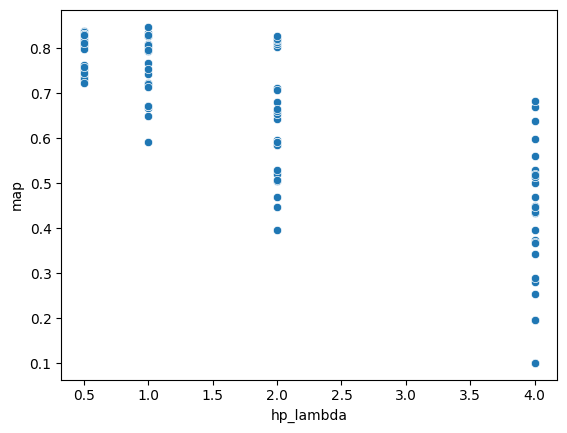

In [18]:
sns.scatterplot(x=df["hp_lambda"], y=df["map"])

<Axes: xlabel='hp_alpha', ylabel='map'>

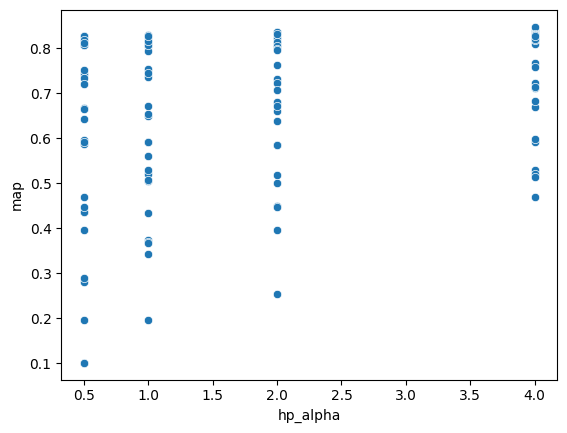

In [19]:
sns.scatterplot(x=df["hp_alpha"], y=df["map"])

<Axes: xlabel='hp_wd', ylabel='map'>

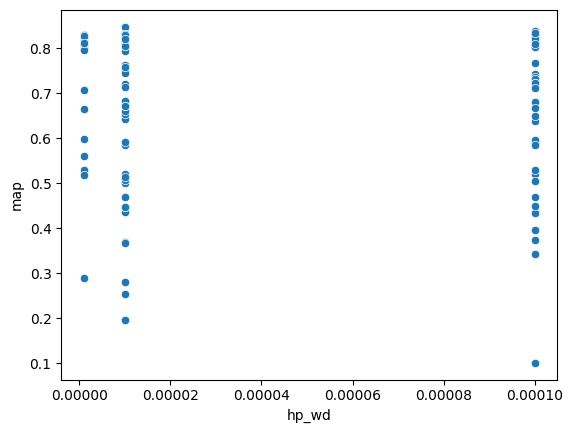

In [ ]:
sns.scatterplot(x=df["hp_lr"], y=df["map"])

<Axes: xlabel='hp_wd', ylabel='map'>

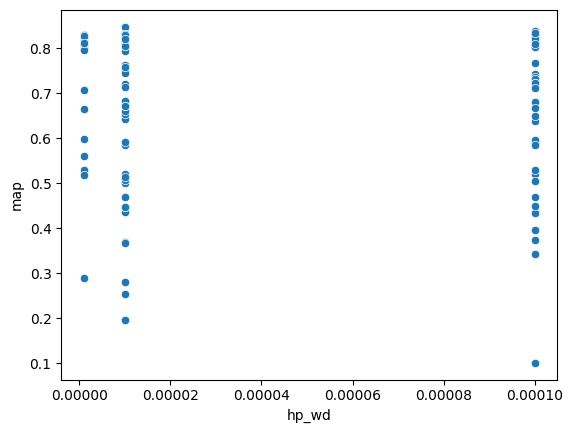

In [22]:
sns.scatterplot(x=df["hp_wd"], y=df["map"])